# Importación de Datos

In [5]:
import tensorflow as tf
import os
import skimage.data as imd
import numpy as np
import datetime #informacion con el tiempo de TF
import matplotlib.pyplot as plt #para graficar
### ===== para tratar las imagenes
from skimage import transform #para redimensionar las imagenes
from skimage.color import rgb2gray#convertir a espacio de color gris. (hay muchos mas como rojo, verde, azul)

import random #aleatory num

In [9]:
tf.__version__

'2.0.0'

In [10]:
#Funcion para importar los datos ==============================
def load_ml_data(data_directory):#recibo la ruta de los datos
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]#voy pasando item por item de cada directoriolisto todos los directorios que se pueden obtener a partir de data_directory
    
    #print(dirs)#muestro directorios DEBUG
    
    labels = [] #array de etiquetas para las fotos
    images = [] #el archivo de imagen en si
    for d in dirs:
        label_dir = os.path.join(data_directory, d)#entro a cada carpetica en la lista dirs
        file_names = [os.path.join(label_dir,f) #reviso cada item del directorio SI es un archivo de imagen lo guardo 
                     for f in os.listdir(label_dir)   
                     if f.endswith(".ppm")]
        #----------DEBUG
        #print(label_dir)#directorios
        #print("\n")
        #print(file_names)#nombres de archivo dentro de ese directorio (cada una de las fotos)
        
        #--- Vamos a recorrer las imagenes
        for f in file_names:
            images.append(imd.imread(f))#leo imagen y la agrego a images conm el formato de datos para skimage
            labels.append(int(d))#numeros enteros para los labels
            
    return images, labels

In [11]:
main_dir = "../datasets/belgian/" #directorio principipal
train_dir = os.path.join(main_dir, "Training") #Directorio de entrenamiento
test_dir = os.path.join(main_dir, "Testing") #directorio de test

In [12]:
X_train, Y_train = load_ml_data(train_dir)#X_train = imagenes Y_train =labels
X_test, Y_test = load_ml_data(test_dir)#X_train = imagenes Y_train =labels

In [13]:
def info_dataset(dataxy):
    print("longitud: ", len(dataxy))
    print("Tipo: ", type(dataxy))
    print("-----")

In [14]:
info_dataset(X_train)#informacion de imagenes train
info_dataset(Y_train)#labels train
info_dataset(X_test)#informacion de imagenes test
info_dataset(Y_test)#labels test

longitud:  4575
Tipo:  <class 'list'>
-----
longitud:  4575
Tipo:  <class 'list'>
-----
longitud:  2520
Tipo:  <class 'list'>
-----
longitud:  2520
Tipo:  <class 'list'>
-----


Debo convertir esos datos en "Datasets" o arrays de datos.

In [15]:
X_img_train = np.array(X_train)
Y_lbl_train = np.array(Y_train)
X_img_test = np.array(X_test)
Y_lbl_test = np.array(Y_test)

In [16]:
print(X_img_train.ndim, Y_lbl_train.ndim) #1 dimension = 1 columna
print(X_img_test.ndim, Y_lbl_test.ndim)
print(X_img_train.size, Y_lbl_train.size)#1 etiqueta para cada imagen
print(X_img_test.size, Y_lbl_test.size)

1 1
1 1
4575 4575
2520 2520


In [17]:
X_img_train[0] #primera foto en formato array, las fotos son valores (los colores - 3 canales y arrays corresponden a cada pixel)
#Es un array de arrays

Array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [18]:
len(set(Y_lbl_train))#cuantas etiquetas UNICAS hay? set solo cuenta

62

In [19]:
def info_imagen(imgs):
    print("Datos iniciales de imagen: ", imgs.flags)
    print("Itemsize:", imgs.itemsize)#elementos en cuantos bits?
    print("# de bytes: ", imgs.nbytes)
    print("Bytes que uso:", imgs.nbytes/imgs.itemsize) #las bytes que estoy utilizando

In [20]:
info_imagen(X_img_train)

Datos iniciales de imagen:    C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
Itemsize: 8
# de bytes:  36600
Bytes que uso: 4575.0


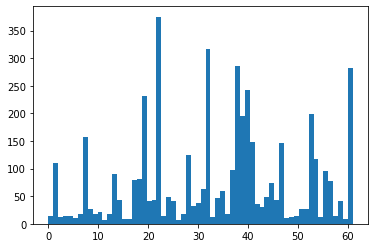

In [21]:
plt.hist(Y_lbl_train, len(set(Y_lbl_train)))
plt.show()

# Frecuencia de las etiquetas (cuantas fotos hay por cada señal)

* Vimos que no todos los tipos de imagenes estan igual de representadas en el dataset
* La red neuronal aprende que a mayor cantidad de señales esta sera mas importante
* Cuidado con ello, la red tirara ante una duda a la mas probable

# Resumen visual de las imagenes

In [22]:
import random

In [23]:
rand_signs = random.sample(range(0,len(Y_lbl_train)),6)#quiero una muestra aleatoria simple
rand_signs

[2020, 2850, 2330, 3519, 656, 1611]

# Muestra las imagenes extraidas de mi carpeta de entrenamiento

In [24]:
def data_random(random_img,dtset_evaluado):#dataset evaluado recibe el conjunto de imagenes (el completo) sobre el cual vamos a iterar
    for i in range(len(rand_signs)):
        temp_img = dtset_evaluado[rand_signs[i]]#imagen actual 
        plt.subplot(1,6,i+1)#dibujo 6 columnas (6 fotitos)
        plt.axis("off")
        plt.imshow(temp_img)#muestro las imagenes 
        plt.subplots_adjust(wspace=0.5)#espacio para que las imagenes no salgan muy pegadas

        plt.show()#muestro

        #la sigueinte notacion viene de Django, me permite poner parametros al texto que se encuentra numerado entre las llaves
        print("Forma: {0}, Min: {1}, Max:{2}".format(temp_img.shape,#altura y ancho
                                                     temp_img.min(),#pixel con menor color
                                                     temp_img.max()))#pixel con mas color

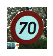

Forma: (202, 191, 3), Min: 0, Max:255


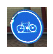

Forma: (124, 122, 3), Min: 1, Max:255


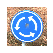

Forma: (375, 379, 3), Min: 12, Max:255


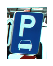

Forma: (215, 163, 3), Min: 0, Max:255


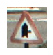

Forma: (60, 58, 3), Min: 0, Max:255


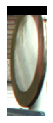

Forma: (272, 98, 3), Min: 0, Max:255


In [25]:
data_random(rand_signs, X_img_train)

## Nota
* Cuidado con los tamaños
* Si la IA se fija en parametros maximos y minimos no va a ser muy efeciciente y para una misma señal hay colores diferentes

# Mostrar las imagenes con sus identificadores

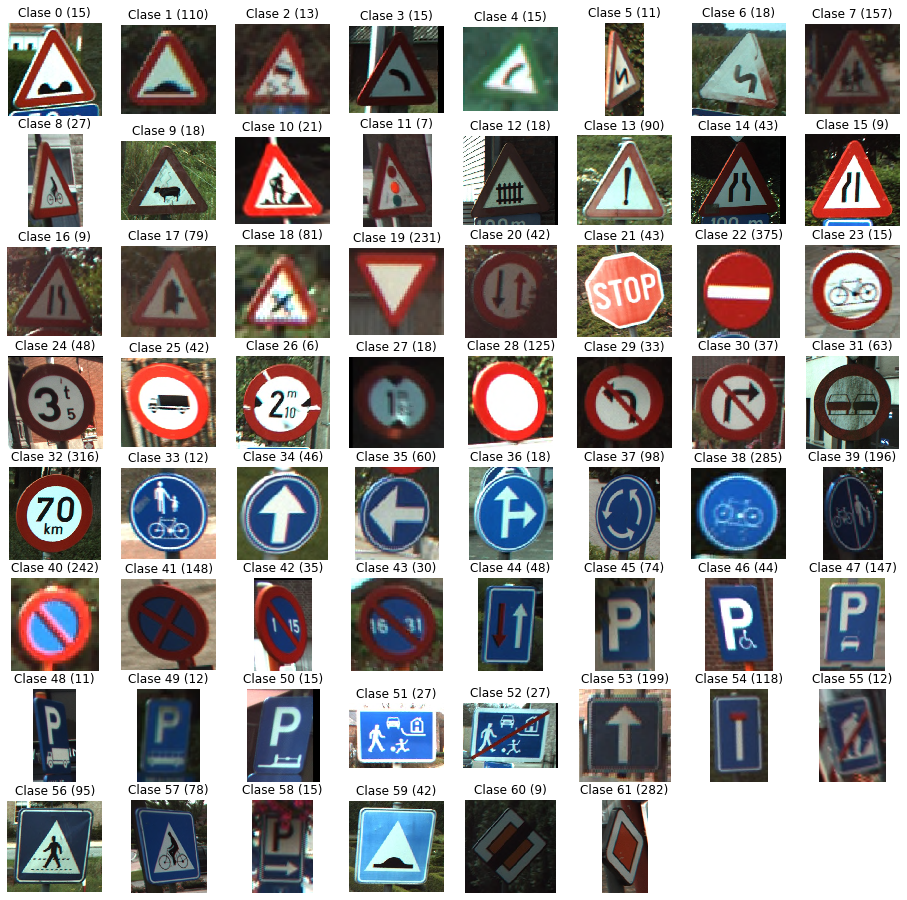

In [29]:
unique_labels = set(Y_lbl_train)#etiquetas unicas
plt.figure(figsize=(16,16))#tamaño de la figura aqui
i=1
for label in unique_labels:
    temp_img = X_img_train[list(Y_lbl_train).index(label)]#me quedo con la imagen en la posicion del indice NO en el indice
    #se convierte en lista para poder usar la propiedad index
    #con esa posicion busco la imagen de la cual procede
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label,list(Y_lbl_train).count(label)))
    i+=1 #manejo contador
    plt.imshow(temp_img)#muestro imagen en bucle
    
plt.show()

### Lo que esta pasando? 
Me esta mostrando para cada imagen (la clase unica) cuantos ejemplos hay. entonces por ejemplo de la clase 22 hay 375 imagenes de ejemplo

### ¿El hecho de que haya mas señales de un tipo indica algun patron? 
--->>> parece que no tienen un patron de seguimiento

* Preprocesado de imagenes previo al ML
* Modelo de red neuronal con TensorFlow
* No todas las imagenes son del mismo tamaño
* Hay 62 clases de imagenes (de 0 a 61)
* La distribucion de señales de trafico NO es uniforme, algunas salen mas veces que otras
* No hay ninguna relacion de importancia con ello. Solo hay mas fotos
* Que vamos a hacer ahora?

### iniciemos por obtener algunos rasgos de nuestras imagenes

* Las reescalaremos
* convertimos a escala de grises utilizar el color como regla de decisión es poco util, resulta perjudicial para la red neuronal, en la mayoria de casos el color no es el principal parametro el nivel de iluminacion influye de formas impredecibles hay fotos muy oscuras y fotos con muchisima luz.

* reescalar las imagenes es un problema importante

In [30]:
#deseo conocer el tamaño de imagen mas pequeño que me puedo encontrar
w = 9999
h = 9999
for image in X_img_train:#paso por todas las imagenes. El tamaño minimo puede ser combinacion de dos fotos diferentes
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print ("tamaño minimo: {0},{1}".format(h,w))

tamaño minimo: 22,20


In [31]:
#doy tamaño 30x30 a todas las imagenes de la carpeta de entrenamiento. las mas pequeñas las hara mas grandes
X_img_train30 = [transform.resize(image,(30,30)) for image in X_img_train]
X_img_train30[0]#los valores cambiaron --> ahora tiene 900 pixeles

array([[[0.72005229, 0.70687582, 0.57784314],
        [0.52505882, 0.40976471, 0.28803922],
        [0.52320261, 0.39620915, 0.28581699],
        ...,
        [0.19869281, 0.22895425, 0.15163399],
        [0.18466667, 0.21152941, 0.14058824],
        [0.18534641, 0.21228758, 0.14169935]],

       [[0.69623529, 0.65879739, 0.53219608],
        [0.49666667, 0.34654902, 0.23752941],
        [0.46705882, 0.32098039, 0.22104575],
        ...,
        [0.18607843, 0.22137255, 0.14294118],
        [0.18980392, 0.22901961, 0.1545098 ],
        [0.19847059, 0.22721569, 0.15901961]],

       [[0.68928105, 0.67254902, 0.53823529],
        [0.50666667, 0.43901961, 0.32901961],
        [0.47941176, 0.40849673, 0.30392157],
        ...,
        [0.18496732, 0.20588235, 0.13333333],
        [0.18823529, 0.22019608, 0.14627451],
        [0.19267974, 0.22366013, 0.15601307]],

       ...,

       [[0.0903268 , 0.12071895, 0.04843137],
        [0.07627451, 0.11058824, 0.0672549 ],
        [0.14052288, 0

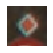

Forma: (30, 30, 3), Min: 0.09803921568627459, Max:0.7680566448801748


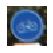

Forma: (30, 30, 3), Min: 0.045163398692810455, Max:0.996078431372549


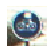

Forma: (30, 30, 3), Min: 0.06737254901960786, Max:0.9921568627450981


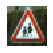

Forma: (30, 30, 3), Min: 0.04526143790849671, Max:0.993474945533769


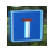

Forma: (30, 30, 3), Min: 0.07228758169934664, Max:0.9921568627450981


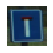

Forma: (30, 30, 3), Min: 0.019607843137255124, Max:0.7127450980392156


In [32]:
#revisamos nuevamente el tamaño, ahora con el cambio aplicado
rand_signs = random.sample(range(0, len(Y_lbl_train)), 6)#genero aleatorio
data_random(rand_signs,X_img_train30)

In [33]:
X_img_train30 = np.array(X_img_train30) #tamaño y tipo de dato correcto para skimage

In [34]:
X_img_train30 = rgb2gray(X_img_train30)

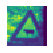

Forma: (30, 30), Min: 0.0, Max:0.5749403039215696


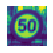

Forma: (30, 30), Min: 0.14709575816993464, Max:0.9952450980392157


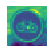

Forma: (30, 30), Min: 0.12090390196078418, Max:0.8102775588235289


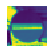

Forma: (30, 30), Min: 0.08987039313725474, Max:0.996078431372549


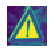

Forma: (30, 30), Min: 0.053970013071895306, Max:0.996078431372549


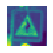

Forma: (30, 30), Min: 0.08893886274509788, Max:0.9848129760348582


In [35]:
rand_signs = random.sample(range(0, len(Y_lbl_train)), 6)
data_random(rand_signs,X_img_train30)
#para que se vea gris agrega esta linea a la funcion inicialmente definida:
#plt.imshow(temp_im, cmap="gray")#especifico la temperatura de color igualmente (SI NO se ve como azul con amarillo)

# Vale la pena consulta tecnicas de preprocesado con skimage
TensorFlow no es el unico paquete para manipulacion de imagenes, tambien esta Keras. pero TensorFlow es muy conocido

* Creacion de mi propia red neuronal
* Voy a crear una red neuronal usando tensorflow

# Construccion de la RNA
Modelo basado en Sequential() indica una capa detras de la otra que van a ser rellenadas con capas totalemnte conectadas

# Se van a calcular una detras de la otra en secuencia
Hyper-parametros de la capa:

* número de unidades/neuronas: 130
* función de activación: ReLU 0 si el valor el negativo, de lo contrario se queda con el valor actual
* input_shape: (30,30) esto tiene correspondencia directa con el tamaño de imagen 30*30
* Capa DropOut
Dropout es una técnica de Regularization donde aleatoriamente se asignan a ciertas neuronas de la red el valor cero. De este modo, mientras se entrena, estas neuronas no actualizarán sus valores. Al tener cierto porcentaje de neuronas sin actualizar, el proceso de entrenamiento toma más tiempo pero por contra tenemos menos posibilidades de sufrir overfitting.

* Significa que en el fase de entrenamiento (propagacion hacia atras) los valores no se van a actualizar

* Estaran dormidas, como no se actualizan cierto porcentaje de ellas conservan sus valores iniciales sin retroalimentarse

# Los valores de DropOut tipicamente estan entre 20% y 50%

* Añadir la segunda capa (capa de salida)
* Unidades: número de clases (62 tipos de señal)
* función de activación: 'softmax' (probabilidades de cada clase) devuelve probabilidad de cual (cuan % esta seguro)

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(30,30))) #capa de aplanado que recibe 900 pixeles 30*30 c/u de las imagenes
model.add(tf.keras.layers.Dense(units=130, activation="relu")) #activador relu, 130 neuronas
model.add(tf.keras.layers.Dense(units=256, activation="sigmoid"))#nueva capa para mejorar efectividad
model.add(tf.keras.layers.Dropout(0.2)) #capa DropOut, 20% NO aprende. Esto para mejorar su eficacia con datos diferentes a los de test
model.add(tf.keras.layers.Dense(units=62, activation='softmax'))
#capa de salida, 62 diferentes categorias

# Compilar
* Optimizer: Adam uno de los mejores optimizadores de gradiente descendiente estocastico es el recomendado por defecto
* Loss: Sparse softmax (categorical) crossentropy. Es decir como va a calcular el error entre la prediccion y la categoria real
* metrics = "sparse_categorical_accuracy", me permite conocer los porcentajes de acierto o eficacia. Como su nombre lo indica me permite medir esto teniendo en cuenta las categorias

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [38]:
model.summary() #resumen de los datos de mi modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 900)               0         
_________________________________________________________________
dense (Dense)                (None, 130)               117130    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33536     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 62)                15934     
Total params: 166,600
Trainable params: 166,600
Non-trainable params: 0
_________________________________________________________________


# Entrenar

In [39]:
model.fit(X_img_train30, Y_lbl_train, epochs=10)

Train on 4575 samples
Epoch 1/10
4575/4575 [==============================] - 3s 758us/sample - loss: 3.2317 - sparse_categorical_accuracy: 0.2278
Epoch 2/10
4575/4575 [==============================] - 1s 128us/sample - loss: 2.1250 - sparse_categorical_accuracy: 0.4846
Epoch 3/10
4575/4575 [==============================] - 1s 129us/sample - loss: 1.5611 - sparse_categorical_accuracy: 0.5993
Epoch 4/10
4575/4575 [==============================] - 1s 119us/sample - loss: 1.2662 - sparse_categorical_accuracy: 0.6678
Epoch 5/10
4575/4575 [==============================] - 1s 118us/sample - loss: 1.0427 - sparse_categorical_accuracy: 0.7220
Epoch 6/10
4575/4575 [==============================] - 1s 118us/sample - loss: 0.8897 - sparse_categorical_accuracy: 0.7572
Epoch 7/10
4575/4575 [==============================] - 1s 118us/sample - loss: 0.7838 - sparse_categorical_accuracy: 0.7812
Epoch 8/10
4575/4575 [==============================] - 1s 113us/sample - loss: 0.6801 - sparse_categor

# Evaluar sobre el conjunto de test
###### NOTA IMPORTANTE Antes de evaluar vamos a tratar las imagenes del dataset de evaluacion. Debemos hacerlas tambien en escala de grises y de 30x30

In [40]:
#doy tamaño 30x30 a todas las imagenes de la carpeta de evaluación. las mas pequeñas las hara mas grandes
X_img_test30 = [transform.resize(image,(30,30)) for image in X_img_test]
#X_img_test30[0]#los valores cambiaron --> ahora tiene 900 pixeles
X_img_test30 = np.array(X_img_test30) #tamaño y tipo de dato correcto para skimage
X_img_test30 = rgb2gray(X_img_test30)#color gris

La celda anterior ejecuto las tareas necesarias para dejar nuestras imagenes de tamaño 30*30, en escala de grises y en el tipo de archivo indicado para skimage

# Ahora evaluamos el modelo sobre test

In [41]:
test_loss, test_accuracy = model.evaluate(X_img_test30, Y_lbl_test)

2520/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Predicciones
intentemos realizar predicciones sobre el conjunto de test y veamos que sucede

In [42]:
predicciones = model.predict(X_img_test30)#el modelo ha predecido la clase para cada imagen del set de testing

In [43]:
numA = random.randrange(len(X_img_test30))#un numero aleatorio entre 0 y 2520 (total valores en test)
numA

1450

In [44]:
predicciones[numA]

array([5.1257820e-07, 4.8968423e-07, 6.5087661e-04, 6.8080879e-04,
       1.0256341e-04, 9.4019240e-05, 1.7851095e-04, 6.3002277e-05,
       2.0593686e-04, 4.3363681e-05, 5.6550376e-05, 8.3528066e-05,
       4.3667956e-07, 5.2788074e-04, 5.5099628e-04, 1.5538544e-05,
       1.4595687e-04, 3.6769165e-05, 6.2439567e-06, 2.2100106e-05,
       4.2189541e-03, 1.3234948e-06, 6.8191192e-05, 4.7789421e-03,
       4.9929437e-03, 1.7248053e-02, 1.9976611e-03, 5.5990275e-04,
       1.6981344e-03, 1.0330202e-01, 1.7915525e-02, 2.9858758e-03,
       8.2563937e-01, 4.8037714e-06, 2.1763888e-05, 5.9070584e-07,
       4.4837539e-05, 2.8261347e-03, 7.7964202e-08, 9.1941856e-06,
       2.8173821e-03, 9.7715521e-05, 1.4379415e-05, 1.6556211e-05,
       7.2862640e-06, 6.0013503e-05, 1.8115874e-04, 4.3064012e-04,
       2.1739838e-04, 1.3458218e-05, 1.5850890e-06, 2.2808480e-04,
       1.1917818e-05, 1.8625133e-04, 1.2716964e-05, 2.1590526e-05,
       2.6562428e-05, 1.8535819e-05, 2.4642090e-05, 9.7146163e

* Una prediccion esta formada por el conjunto de todas las probabilidades. En este caso con 62 diferentes etiquetas. Tenemos 6 probabilidades diferentes.

* La mas alta es la elegida. Se puede ver con np.argmax


In [45]:
np.argmax(predicciones[numA]) #devuelve la etiqueta con mas probabilidad (la etiqeuta predecida)

32

In [46]:
Y_lbl_test[numA] #Muestra la etiqueta REAL que tiene esa imagen en nuestro dataset

32

Examinando las etiquetas de test muestra que esta clasificaion es correcta pues el valor devuelto es el mismo tanto prediccion como en nuestro dataset

* Puede darse el caso de que no coincidan. Recuerda que la red tiene solo un 85% de efectividad
### Graficar
Conjunto aleatorio de 10 imagenes de test para evaluar de forma grafica y comprobar su efectividad

* Ya tengo un array de todo un conjunto de test con las predicciones
* lo almacene en predicciones, consulta la seccion "predicciones" mas arriba para verlo

### Que vamos a hacer?
* Generar 10 numeros aleatorios en el rango de imagenes de test
* tomo el valor REAL de mi dataset en la posicion i de "Y_lbl_test" que contiene las etiquetas para conjunto de testing
* tomo el valor que fue predicho en la posicion i de "predicciones"
* pinto grafico 4.1 Comparo si ambos valores: verdadero y predicho coinciden y pinto verde o rojo segun corresponde

Verde imagenes correctamente clasificadas.

Roja: clasificadas erroneamente

In [47]:
ejemplo_idx = random.sample(range(len(X_img_test30)), 16)# numero aleatorios en rango de imagenes

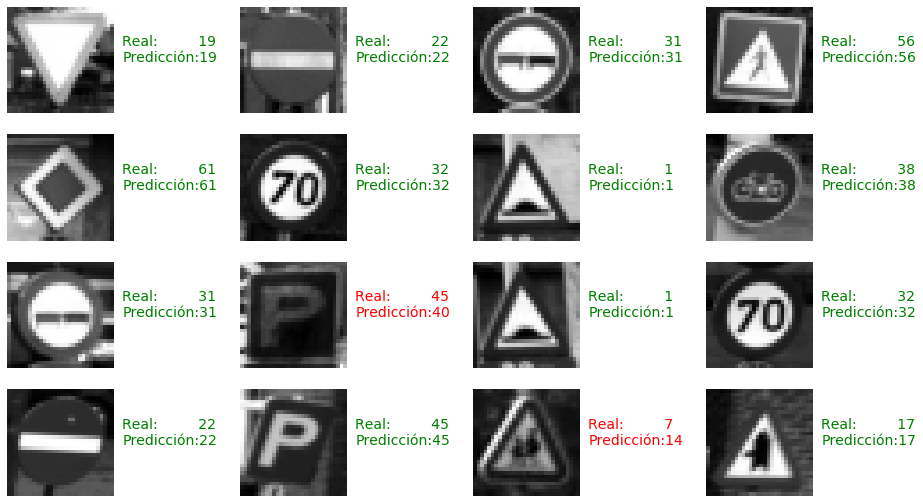

In [48]:
plt.figure(figsize=(16,9))#tamaño de imagen a mostrar
m=1#para controlar lugar sobre el cual dibujar
for i in ejemplo_idx:#en el rango de mis 10 valores generados
    verdadero = Y_lbl_test[i]#la etiqueta real de la imagen predicha (del dataset de etiquetas para testing)
    predicho = np.argmax(predicciones[i])#valor de etiqueta predecido por la RNA
    #print(verdadero, ":", predecido)
    plt.subplot(4,4,m)
    m+=1
    plt.axis("off")
    color = "green" if verdadero == predicho else "red"
    plt.text(32,15, "Real:         {0}\nPredicción:{1}".format(verdadero,predicho), fontsize=14, color = color)
    plt.imshow(X_img_test30[i], cmap="gray")
plt.show()

# Recomendaciones
Si quieres probar el codigo, te dejo un video de como instalar Tensorflow en windows y anaconda, recuerda que debes verificar que versión de Tensorflow estás usando, en este caso es la 2
https://www.youtube.com/watch?v=b_xBT36HJAU